In [1]:
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt

In [2]:
today = datetime.date.today()
print(today)

2022-03-23


In [3]:
sentences = ['Lacus a donec, vitae gravida proin sociis.', 
             'Neque ipsum! rhoncus cras quam.']

+ ``r""`` : "raw-string" no interpretation of backslashes
+ ``\w`` : (unicode) any word character (letter, number, underscore)
+ ``*`` : 0 or more repetition.s of the preceding RE
+ ``+`` : 1 or more repetition.s of the preceding RE
+ ``[ ]`` : set of character.s, listed individually
+ ``\W`` : any character that is not a word character (opposite of \w)

&rightarrow; In each sentence, searching for **every** (``re.findall()``) word ending with either "a" or "m" and a non-word character. Backslashes are interpreted by regexp.

In [4]:
for sentence in sentences:
    print(f"---- dans >{sentence}<")
    print(re.findall(r"\w*[am]\W", sentence))

---- dans >Lacus a donec, vitae gravida proin sociis.<
['a ', 'gravida ']
---- dans >Neque ipsum! rhoncus cras quam.<
['ipsum!', 'quam.']


&rightarrow; sep = any 1 or more non-word character

In [5]:
for sentence in sentences:
    print(f"---- dans >{sentence}<")
    print(re.split(r"\W+", sentence))
    print()

---- dans >Lacus a donec, vitae gravida proin sociis.<
['Lacus', 'a', 'donec', 'vitae', 'gravida', 'proin', 'sociis', '']

---- dans >Neque ipsum! rhoncus cras quam.<
['Neque', 'ipsum', 'rhoncus', 'cras', 'quam', '']



In [6]:
for sentence in sentences:
    sentence = sentence.strip(".")
    print(f"---- dans >{sentence}<")
    print(re.split(r"\W+", sentence))
    print()

---- dans >Lacus a donec, vitae gravida proin sociis<
['Lacus', 'a', 'donec', 'vitae', 'gravida', 'proin', 'sociis']

---- dans >Neque ipsum! rhoncus cras quam<
['Neque', 'ipsum', 'rhoncus', 'cras', 'quam']



&rightarrow; replace a group (defined between parenthesis) by that same group ("``\1``") between the chars "X" and "Y". Here group = any 1 or more word-character = any word.

In [7]:
for sentence in sentences:
    print(f"---- dans >{sentence}<")
    print(re.sub(r"(\w+)", r"X\1Y", sentence))
    print()

---- dans >Lacus a donec, vitae gravida proin sociis.<
XLacusY XaY XdonecY, XvitaeY XgravidaY XproinY XsociisY.

---- dans >Neque ipsum! rhoncus cras quam.<
XNequeY XipsumY! XrhoncusY XcrasY XquamY.



In [8]:
samples = ['890hj000nnm890', '123abc456def789', '8090abababab879']

In [10]:
regexp3 = "(?P<id>[0-9]+)[A-Za-z]+(?P<needle>[0-9]+)[A-Za-z]+(?P=id)"

&rightarrow; Instead of using the modules' fonctions de commodités (compiling many times if many chains):

In [10]:
print(f"REGEXP={regexp3}\n")
for sample in samples:
    match = re.match(regexp3, sample)
    print(f"{sample:>16} → {match}")    

REGEXP=(?P<id>[0-9]+)[A-Za-z]+(?P<needle>[0-9]+)[A-Za-z]+(?P=id)

  890hj000nnm890 → <re.Match object; span=(0, 14), match='890hj000nnm890'>
 123abc456def789 → None
 8090abababab879 → None


&rightarrow; Compiling the regexp chain only once (using ``re.compile()``) and comparing it to the chains:

In [11]:
re_obj3 = re.compile(regexp3)
for sample in samples:
    match = re_obj3.match(sample)
    print(f"{sample:>16} → {match}")

  890hj000nnm890 → <re.Match object; span=(0, 14), match='890hj000nnm890'>
 123abc456def789 → None
 8090abababab879 → None


In [12]:
re_obj3.match(samples[0]).group("id")

'890'

In [13]:
type(re_obj3)

re.Pattern

In [14]:
samples = [n*'ab' for n in [0, 1, 3, 4]] + ['baba']
samples

['', 'ab', 'ababab', 'abababab', 'baba']

##### Exo noms variables:

In [54]:
# regex = r"\A([A-Za-z_])[A-Za-z0-9_]*"
regexp_obj = re.compile(r"\A([A-Za-z_])[A-Za-z0-9_]*")
print(regexp_obj.match("a-a"))
# print(re.match(regex, "aa-1"))

<re.Match object; span=(0, 1), match='a'>


##### Exo agenda:

In [16]:
regex2 = r"\A(?P<prenom>[A-Za-z-]*):(?P<nom>[A-Za-z-]+):?\Z"
matching = re.match(regex2, 'AcaC:Din-bou:')
matching.group("nom")

'Din-bou'

In [17]:
regex22 = r"\A(?P<prenom>[-\w]*):(?P<nom>[-\w]+):?\Z"
matching = re.match(regex2, 'Jean-Noel:Dupont-Nemours')
print(matching)

<re.Match object; span=(0, 24), match='Jean-Noel:Dupont-Nemours'>


##### Exo telephone:

In [18]:
regex3 = r"\A(0|\+33)(?P<number>[0-9]{9})\Z"
matching = re.match(regex3, "0789456123")
print(matching)

<re.Match object; span=(0, 10), match='0789456123'>


##### Exo url:

In [19]:
regproto = r"(?i)(?P<proto>http|https|ftp|ssh)"
print(re.match(regproto, "https"))

<re.Match object; span=(0, 4), match='http'>


In [20]:
# correction protocol
proto_list = ["http", "https", "ftp", "ssh"]
regproto2 = r"(?i)(?P<proto>" + "|".join(proto_list) + ")"
print(re.match(regproto, "https"))

<re.Match object; span=(0, 4), match='http'>


In [21]:
reguser = r"(?P<user>[a-z0-9]*\Z)"
print(re.match(reguser, "45aa6"))

<re.Match object; span=(0, 5), match='45aa6'>


In [22]:
regpass = r"(\A(:)(?P<password>[^:]+)@\Z)"
print(re.match(regpass, ":azertg!?;@"))

<re.Match object; span=(0, 11), match=':azertg!?;@'>


In [23]:
reg_host = r"(?P<hostname>[a-z0-9_.]+)\Z"
re.match(reg_host, "google7_hallo.com")

<re.Match object; span=(0, 17), match='google7_hallo.com'>

port and path optionnals &rightarrow; ``r"(?P<thing>...)?"`` instead of ``r"(|(?P<thing>...))"``

In [24]:
reg_port = r"(|:(?P<port>[0-9]+))\Z"
re.match(reg_port, ":789542").group("port")

'789542'

In [25]:
reg_path = r"(|/(?P<path>.*))"

In [26]:
reg_user_pass = r"(?P<user>[a-z0-9]*)(|:(?P<password>[^:]+))@"
print(re.match(reg_user_pass, "azerf2:ghj,;!585@").group("password"))
# print(re.match(prout, "azerf2:zert,;!8@").group("password"))

ghj,;!585


In [27]:
reg_final = r"(?i)(?P<proto>http|https|ftp|ssh)://(|((?P<user>[a-z0-9]*)(|:(?P<password>[^:]+))@))(?P<hostname>[a-z0-9_.]+)(|:(?P<port>[0-9]+))/(|(?P<path>.*))\Z"
print(re.match(reg_final, "ftP://matylde:péènèl@1_google.com/"))

<re.Match object; span=(0, 34), match='ftP://matylde:péènèl@1_google.com/'>


In [28]:
liste = [0, 1, 2, 3]

In [29]:
liste[2] = 4
liste

[0, 1, 4, 3]

In [30]:
b = 'azf'
for i in b:
    print(i)

a
z
f


In [31]:
def label(prenom, note):
    if note < 10:
        return(f"{prenom} est recalé.e")
    elif note in range(10, 16):
        return(f"{prenom} est reçu.e")
    else:
        return(f"félicitations à {prenom}")

In [32]:
label('Rémi', -1)

'Rémi est recalé.e'

In [33]:
dic = {'Rémi': 8, 'Marie': 16, 'Jean': 10, 'Sarah': 19}

In [34]:
for key in dic:
    print(label(key, dic[key]))

Rémi est recalé.e
félicitations à Marie
Jean est reçu.e
félicitations à Sarah


In [55]:
def inconnue(composite, connue):
    return(composite[len(connue):-len(connue)])

In [56]:
inconnue("ABC01mAC122ABC01", "ABC01")

'mAC122'

In [57]:
# return alone will return 'None'
def laccess(liste):
    if len(liste) == 0:
        return
    elif len(liste) % 2 == 0:
        return liste[-1]
    else:
        return liste[len(liste) // 2]

In [58]:
laccess([1, 2, 3, 4, 5])

3

In [40]:
def divisible(a, b):
    if a % b == 0 or b % a == 0:
        return True
    return False

In [41]:
divisible(10, 30)

True

In [42]:
def morceaux(x):
    if x <= -5:
        return(-x - 5)
    elif x >= 5:
        return(1/5 * x - 1)
    return 0

In [43]:
morceaux(10)

1.0

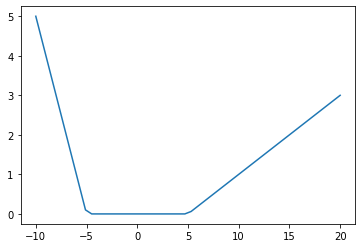

In [44]:
X = np.linspace(-10, 20)
Y = np.vectorize(morceaux)(X)
plt.plot(X, Y)
plt.show()

In [45]:
def wc(string):
    line = string.count("\n")
    word = len(string.split())
    char = len(string)
    return([line, word, char])

In [46]:
wc(('Python is a programming language\n'
   'that lets you work quickly\n'
   'and integrate systems more effectively.'))

[2, 15, 99]

In [47]:
def P(x):
    return (2 * x**2) - (3 * x) - 2

In [48]:
def liste_P(liste_x):
    return [P(x) for x in liste_x]

In [49]:
liste_P([0, 1, 2, 3, 4])

[-2, -3, 0, 7, 18]

In [50]:
def carre(ligne):
    liste = re.split(r"\W+", ligne)
    liste_carre = [str(int(x)**2) for x in liste if x]
    return ":".join(liste_carre)

In [51]:
carre('; 12 ;  -23;\t60; 1\t')

'144:529:3600:1'